## Regression using TF-Regression model

California Housing Data

This data set contains information about all the block groups in California from the 1990 Census. In this sample a block group on average includes 1425.5 individuals living in a geographically compact area. 

The task is to aproximate the median house value of each block from the values of the rest of the variables. 

It has been obtained from the LIACC repository. The original page where the data set can be found is: http://www.liaad.up.pt/~ltorgo/Regression/DataSets.html.


In [1]:
import tensorflow as tf
import pandas as pd

In [2]:
hd=pd.read_csv('cal_housing_clean.csv')

In [3]:
hd.head()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


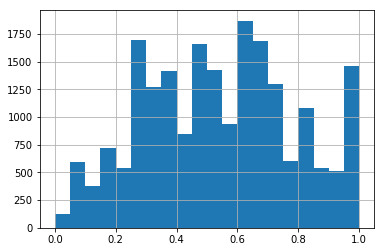

In [30]:
hd['housingMedianAge'].hist(bins=20)

# Normalise the data

In [5]:
#hd.columns

In [6]:
colmns_to_norm=['housingMedianAge', 'totalRooms', 'totalBedrooms', 'population', 'households', 'medianIncome']

In [7]:
hd[colmns_to_norm]=hd[colmns_to_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()))

In [8]:
x_data=hd.drop('medianHouseValue', axis=1)

In [9]:
y_val=hd['medianHouseValue']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data,y_val,test_size=0.3,random_state=101)

In [11]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#scaler.fit(X_train)

In [12]:
X_train.head()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome
6761,0.352941,0.069688,0.117163,0.039043,0.115442,0.142508
3010,0.607843,0.011242,0.015673,0.006699,0.014142,0.045027
7812,0.666667,0.025230,0.031347,0.016789,0.030258,0.212866
8480,0.666667,0.032530,0.033830,0.019816,0.030094,0.298651
1051,0.294118,0.031919,0.035692,0.015583,0.034863,0.272631


# Assign the Feature columns

In [13]:
hma=tf.feature_column.numeric_column('housingMedianAge')
tr=tf.feature_column.numeric_column('totalRooms')
tbdr=tf.feature_column.numeric_column('totalBedrooms')
popln=tf.feature_column.numeric_column('population')
hholds=tf.feature_column.numeric_column('households')
mi=tf.feature_column.numeric_column('medianIncome')


In [14]:
feat_cols=[hma,tr,tbdr,popln,hholds,mi]


In [15]:
## Built InPut function

In [16]:
input_func=tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)


In [17]:
model = tf.estimator.DNNRegressor(hidden_units=[6,6,6],feature_columns=feat_cols)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\raprabhu\\AppData\\Local\\Temp\\tmp4bxq4l7q', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001DAD9338240>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [18]:
model.train(input_fn=input_func,steps=25000)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\raprabhu\AppData\Local\Temp\tmp4bxq4l7q\model.ckpt.
INFO:tensorflow:loss = 578905500000.0, step = 1
INFO:tensorflow:global_step/sec: 533.153
INFO:tensorflow:loss = 322344850000.0, step = 101 (0.188 sec)
INFO:tensorflow:global_step/sec: 701.697
INFO:tensorflow:loss = 632236540000.0, step = 201 (0.143 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 707.331
INFO:tensorflow:loss = 51404472000.0, step = 6001 (0.140 sec)
INFO:tensorflow:global_step/sec: 779.183
INFO:tensorflow:loss = 166479460000.0, step = 6101 (0.129 sec)
INFO:tensorflow:global_step/sec: 717.512
INFO:tensorflow:loss = 141337350000.0, step = 6201 (0.140 sec)
INFO:tensorflow:global_step/sec: 761.341
INFO:tensorflow:loss = 92249326000.0, step = 6301 (0.134 sec)
INFO:tensorflow:global_step/sec: 838.103
INFO:tensorflow:loss = 100690560000.0, step = 6401 (0.117 sec)
INFO:tensorflow:global_step/sec: 874.854
INFO:tensorflow:loss = 94670570000.0, step = 6501 (0.112 sec)
INFO:tensorflow:global_step/sec: 824.182
INFO:tensorflow:loss = 114670570000.0, step = 6601 (0.123 sec)
INFO:tensorflow:global_step/sec: 727.848
INFO:tensorflow:loss = 96200430000.0, step = 6701 (0.134 sec)
INFO:tensorflow:global_step/sec: 906.994
INFO:tensorflow:loss = 43373720000.0, step = 6801 (0.112 sec)
INFO:tensorflow:global_step/sec: 923.469
INFO:tensorflow:loss = 87186

INFO:tensorflow:global_step/sec: 810.852
INFO:tensorflow:loss = 49824432000.0, step = 13901 (0.121 sec)
INFO:tensorflow:global_step/sec: 767.19
INFO:tensorflow:loss = 157070230000.0, step = 14001 (0.128 sec)
INFO:tensorflow:global_step/sec: 838.105
INFO:tensorflow:loss = 36843890000.0, step = 14101 (0.121 sec)
INFO:tensorflow:global_step/sec: 797.879
INFO:tensorflow:loss = 99806360000.0, step = 14201 (0.125 sec)
INFO:tensorflow:global_step/sec: 804.305
INFO:tensorflow:loss = 100848370000.0, step = 14301 (0.127 sec)
INFO:tensorflow:global_step/sec: 707.343
INFO:tensorflow:loss = 105691275000.0, step = 14401 (0.138 sec)
INFO:tensorflow:global_step/sec: 727.991
INFO:tensorflow:loss = 76401500000.0, step = 14501 (0.136 sec)
INFO:tensorflow:global_step/sec: 744.285
INFO:tensorflow:loss = 86761160000.0, step = 14601 (0.134 sec)
INFO:tensorflow:global_step/sec: 791.544
INFO:tensorflow:loss = 103391090000.0, step = 14701 (0.127 sec)
INFO:tensorflow:global_step/sec: 744.292
INFO:tensorflow:loss

INFO:tensorflow:global_step/sec: 1033.29
INFO:tensorflow:loss = 113650060000.0, step = 21801 (0.097 sec)
INFO:tensorflow:global_step/sec: 833.314
INFO:tensorflow:loss = 84928530000.0, step = 21901 (0.120 sec)
INFO:tensorflow:global_step/sec: 1074.91
INFO:tensorflow:loss = 35589833000.0, step = 22001 (0.109 sec)
INFO:tensorflow:global_step/sec: 812.34
INFO:tensorflow:loss = 160818950000.0, step = 22101 (0.107 sec)
INFO:tensorflow:global_step/sec: 897.358
INFO:tensorflow:loss = 104393160000.0, step = 22201 (0.111 sec)
INFO:tensorflow:global_step/sec: 764.307
INFO:tensorflow:loss = 141699280000.0, step = 22301 (0.131 sec)
INFO:tensorflow:global_step/sec: 776.586
INFO:tensorflow:loss = 31916622000.0, step = 22401 (0.129 sec)
INFO:tensorflow:global_step/sec: 755.081
INFO:tensorflow:loss = 136328640000.0, step = 22501 (0.132 sec)
INFO:tensorflow:global_step/sec: 773.202
INFO:tensorflow:loss = 97645920000.0, step = 22601 (0.129 sec)
INFO:tensorflow:global_step/sec: 749.36
INFO:tensorflow:loss

# Model Evalauation

In [19]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [20]:
results=model.predict(pred_input_func)

In [21]:
predictions = list(results)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\raprabhu\AppData\Local\Temp\tmp4bxq4l7q\model.ckpt-25000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [22]:
predictions

[{'predictions': array([235694.22], dtype=float32)},
 {'predictions': array([302667.94], dtype=float32)},
 {'predictions': array([215717.38], dtype=float32)},
 {'predictions': array([186778.11], dtype=float32)},
 {'predictions': array([273018.34], dtype=float32)},
 {'predictions': array([201340.67], dtype=float32)},
 {'predictions': array([227419.98], dtype=float32)},
 {'predictions': array([207261.33], dtype=float32)},
 {'predictions': array([217668.75], dtype=float32)},
 {'predictions': array([191015.48], dtype=float32)},
 {'predictions': array([206961.75], dtype=float32)},
 {'predictions': array([225873.45], dtype=float32)},
 {'predictions': array([194135.42], dtype=float32)},
 {'predictions': array([179706.61], dtype=float32)},
 {'predictions': array([260436.45], dtype=float32)},
 {'predictions': array([178763.05], dtype=float32)},
 {'predictions': array([202062.3], dtype=float32)},
 {'predictions': array([189225.16], dtype=float32)},
 {'predictions': array([183457.45], dtype=float

In [23]:
final_preds = []
for pred in predictions:
    final_preds.append(pred['predictions'][0])

In [24]:
final_preds

[235694.22,
 302667.94,
 215717.38,
 186778.11,
 273018.34,
 201340.67,
 227419.98,
 207261.33,
 217668.75,
 191015.48,
 206961.75,
 225873.45,
 194135.42,
 179706.61,
 260436.45,
 178763.05,
 202062.3,
 189225.16,
 183457.45,
 236986.7,
 173850.34,
 235705.75,
 216787.39,
 171644.11,
 190811.44,
 267182.56,
 186890.19,
 147823.95,
 178408.8,
 215929.7,
 244059.95,
 208361.5,
 236403.83,
 223850.1,
 199194.02,
 185370.95,
 186881.77,
 199440.45,
 208999.8,
 207346.44,
 221635.55,
 206617.95,
 204552.72,
 202915.89,
 227624.27,
 215916.88,
 231339.4,
 173651.6,
 202735.14,
 214212.39,
 179327.47,
 212083.33,
 291638.38,
 194093.64,
 197139.34,
 177295.17,
 218198.39,
 209829.92,
 232297.36,
 202515.83,
 235230.34,
 287499.34,
 271158.47,
 225228.38,
 175833.02,
 215445.9,
 196448.1,
 260639.05,
 243866.83,
 214018.98,
 209853.42,
 194202.0,
 188764.3,
 199868.36,
 201213.28,
 224496.1,
 245205.25,
 193865.95,
 288085.75,
 205846.11,
 224873.64,
 240673.34,
 212440.28,
 183175.95,
 23673

In [25]:
#def Average(lst): 
#    return sum(lst) / len(lst) 

#x=Average(final_preds)

In [26]:
#x

In [27]:
#n = len(final_preds) 
#final_preds.sort() 
  
#if n % 2 == 0: 
#    median1 = final_preds[n//2] 
#    median2 = final_preds[n//2 - 1] 
#    median = (median1 + median2)/2
#else: 
#    median = final_preds[n//2] 
#print("Median is: " + str(median)) 

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
mean_squared_error(y_test,final_preds)**0.5

100308.7065621077

# Median house value of the house in California on basis of 1990 Census ~=100k